# Market Recommendation for a New Product
## Brief Summary
The premise is that we are promoting a new cup made of reusable materials into an existing (mock) market. We need to find out which types of shops among local businessess in which to market the new cup. The shops in the market are as follows:
* Cafe
* Coffee shop
* Espresso shop
* Others

This notebook is made up of the sections below:
1. Data validation and cleaning
2. Intepretation
3. Grouped intepretation
4. Conclusion

## Data validation and cleaning
Data validation will be done to verify the state of the imported data - whether it's usable, needs to be cleaned, or where there are blatant problems.

Cleaning is self explanatory.


In [1]:
# imports libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the csv file
coffee = pd.read_csv('coffee.csv')
print(coffee)

    Region                   Place name   Place type  Rating  Reviews Price  \
0        C                     Dim Kavu       Others     4.6    206.0    $$   
1        C                      Коферум         Cafe     5.0     24.0    $$   
2        C             Кофейня Світ Чаю  Coffee shop     5.0     11.0    $$   
3        C             Кофейня Starcoff  Coffee shop     4.4    331.0    $$   
4        C        Кофейня "Friend Zone"  Coffee shop     5.0     12.0    $$   
..     ...                          ...          ...     ...      ...   ...   
195      H                       Artist       Others     4.6    963.0   $$$   
196      H                   Dream Cafe         Cafe     4.3    646.0    $$   
197      H  РУТА КАФЕ ПП КУЛІЧЕНКО К.І.         Cafe     4.6     16.0    $$   
198      H               Ob'yektna Kava  Coffee shop     4.7    599.0    $$   
199      H   О...МАРАТ КАФЕ ПП ПОЛІСТЕП         Cafe     4.3    341.0    $$   

     Delivery option Dine in option Takeout option 

Well let's take a look at the dataframe

In [3]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [4]:
# checks for the number of unique items in each column
for column in coffee:
  print(column, ':', coffee[column].nunique())

Region : 10
Place name : 187
Place type : 4
Rating : 12
Reviews : 163
Price : 3
Delivery option : 2
Dine in option : 1
Takeout option : 1


region is fine - 10 unique values\
place name is not fine - suggests that there are duplicate entries\
place type is fine - 4 unique types\
rating we will need to inspect with max() and min() to see if it's appropriate\
reviews seem fine - will inpsect with max() and min()\
price is fine - 3 values\
delibery option is fine - 2 values\
dine in option will need to be cleaned\
takeout option will need to be cleaned

In [5]:
coffee.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


we can see that the range of values for rating and reviews are acceptable

In [6]:
coffee_dupli = coffee.duplicated(subset='Place name', keep=False)
print(coffee[coffee_dupli])

    Region               Place name    Place type  Rating  Reviews Price  \
23       J             Coffee House          Cafe     4.7    329.0    $$   
45       F             coffee House   Coffee shop     4.7    279.0    $$   
66       B                 Dim Kavy  Espresso bar     4.8    118.0    $$   
68       B             Coffee House        Others     4.7    132.0    $$   
71       B                MY COFFEE   Coffee shop     4.5    341.0    $$   
97       A                MY COFFEE   Coffee shop     4.8    150.0    $$   
100      E  Lviv Coffee Manufacture   Coffee shop     4.7  17937.0    $$   
101      E                Svit Kavy   Coffee shop     4.6   2931.0    $$   
107      E                Svit Kavy   Coffee shop     4.3    102.0    $$   
108      E  Lviv Coffee Manufacture   Coffee shop     4.5    778.0    $$   
112      E             coffee House   Coffee shop     4.7    363.0    $$   
120      D                  SV Кафе          Cafe     4.5    998.0    $$   
132      D  

We do indeed have duplicated names in the 'Place name' column. An even bigger problem is that different duplicated entries have different place types, ratings, reviews.

This is not something that can be fixed just by doing "some cleaning". Best to verify with the source of the csv file again.

### Data validation: results
Imported csv file has **200 rows x 9 columns**. All rows apart from 'Rating', 'Review', 'Dine in option', 'Takeout option' have no missing values.

'Rating', and 'Review' both have 2 missing values - these rows will be dropped in the data cleaning step below.

'Dine in option' and 'Takeout option' both have 140 and 144 non-null values respectively. These missing values will be replaced with **False** in the data cleaning step.

There are duplicated names in the 'Place name' column. An even bigger problem is that different duplicated entries have different place types, ratings, reviews. This is not something that can be fixed immediately. Best to verify with the source of the csv file again.

Now to clean the data

In [7]:
# dropping rows with missing values in rating and reviews
coffee_clean = coffee.dropna(subset=['Rating', 'Reviews'])
coffee_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place name       198 non-null    object 
 2   Place type       198 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            198 non-null    object 
 6   Delivery option  198 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 14.1+ KB


In [8]:
# replacing null values with False in 'Dine in option' and 'Takeout option'
fill_columns = {'Dine in option':False, 'Takeout option':False}
coffee_clean = coffee_clean.fillna(fill_columns)
coffee_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place name       198 non-null    object 
 2   Place type       198 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            198 non-null    object 
 6   Delivery option  198 non-null    bool   
 7   Dine in option   198 non-null    bool   
 8   Takeout option   198 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 11.4+ KB


In [9]:
# checks for the number of unique items in each column
for column in coffee_clean:
  print(column, ':', coffee_clean[column].nunique())

Region : 10
Place name : 185
Place type : 4
Rating : 12
Reviews : 163
Price : 3
Delivery option : 2
Dine in option : 2
Takeout option : 2


In [10]:
# checks for the number of unique items in each column
exclude_columns = ['Place name', 'Reviews', 'Rating']

for column in coffee_clean:
  if column not in exclude_columns:
    print(column, ':', coffee_clean[column].unique())

Region : ['C' 'J' 'F' 'B' 'A' 'E' 'D' 'G' 'I' 'H']
Place type : ['Others' 'Cafe' 'Coffee shop' 'Espresso bar']
Price : ['$$' '$' '$$$']
Delivery option : [False  True]
Dine in option : [False  True]
Takeout option : [False  True]


### Data cleaning: results
Cleaned the data - removed the two rows with missing 'Rating' and 'Reviews'.

Also replaced the missing values in 'Dine in option' and 'Takeout option' with False.

Final dataframe has **198 rows x 9 columns**. More details on eaach column below:
* region is fine - 10 unique values
* place name has only 185 unique values. This suggests that there are duplicate entries
* place type is fine - 4 unique types
* rating values range from 3.9 to 5.0. This is perfectly fine.
* reviews seem fine - range from 3 to 17937. While 3 is quite little, it is perfectly normal for lesser known shops to have very little number of customers leaving reviews/
* price is fine - 3 values
* delivery option is fine - True or False
* dine in option is fine - True or False
* takeout option is fine - True or False

## Intepretation


### What is the most common place type in this market?

In [11]:
# finding the most common place type
place_type = coffee_clean.groupby('Place type')['Place type'].count()
print(place_type)

Place type
Cafe            57
Coffee shop     96
Espresso bar    20
Others          25
Name: Place type, dtype: int64


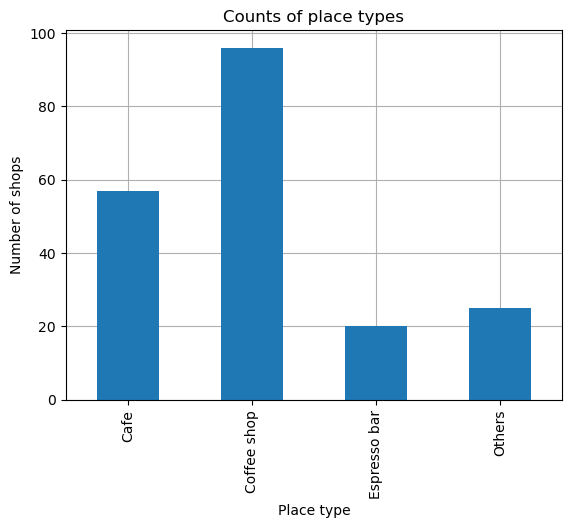

In [12]:
# plotting this
place_type.plot(kind='bar')
plt.xlabel('Place type')
plt.ylabel('Number of shops')
plt.title('Counts of place types')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

plt.show()

Coffee shops are the most numerous in this market with 96 counts. Cafes are in second place with 57 counts.

By simply just looking at number of locations, coffee shops will be a good place to market the cups.

### How does the range in number of reviews differ across all shops


In [13]:
reviews = coffee_clean['Reviews']
reviews.head()

0    206.0
1     24.0
2     11.0
3    331.0
4     12.0
Name: Reviews, dtype: float64

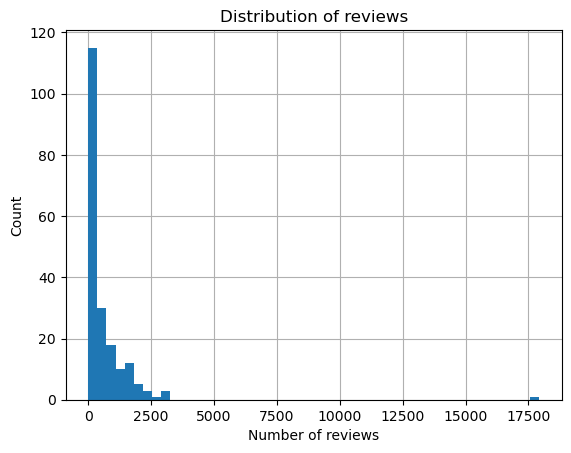

<Figure size 640x480 with 0 Axes>

In [14]:
# making a histogram to show the distribution
reviews.hist(bins=50)

plt.xlabel('Number of reviews')
plt.ylabel('Count')
plt.title('Distribution of reviews')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

plt.show()
plt.savefig('fig_1.png', dpi='figure')

We can see one outlier (which was 17937 reviews). Let's try removing that outlier so we can take a look at the histogram again.

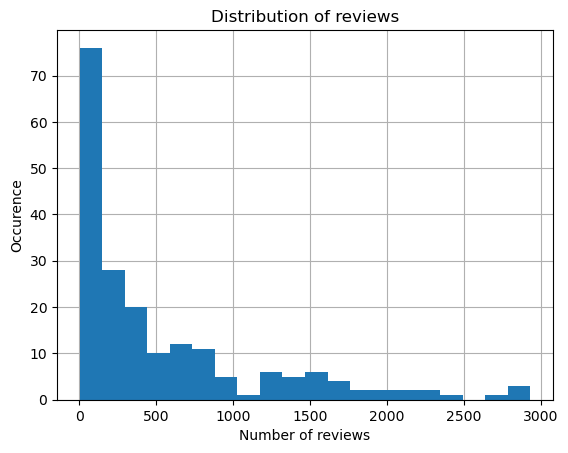

<Figure size 640x480 with 0 Axes>

In [15]:
# taking out the outlier
max = coffee_clean['Reviews'].max()
coffee_flat = coffee_clean[coffee_clean['Reviews'] != max]

reviews = coffee_flat['Reviews']

plt.clf()

# making a histogram to show the distribution
reviews.hist(bins=20)

plt.xlabel('Number of reviews')
plt.ylabel('Occurence')
plt.title('Distribution of reviews')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

plt.show()
plt.savefig('fig_2.png', dpi='figure')

From the histogram above we can see that the large majority of number of reviews are 500 or less. Getting a shop with more than 500 is rare.

However, shops with a large number of reviews indicate a large number of human traffic. So these are worthwhile to take a look as well.

For curiosity's sake let's take a look at the outlier with almost 18000 reviews.

In [16]:
# taking a look at the outlier
print(coffee_clean[coffee_clean['Reviews'] == max])



    Region               Place name   Place type  Rating  Reviews Price  \
100      E  Lviv Coffee Manufacture  Coffee shop     4.7  17937.0    $$   

     Delivery option  Dine in option  Takeout option  
100             True            True            True  


### How does the number of reviews vary across each place type?

In [17]:
# making a dictionary that maps color for different place types for scatter plot
color_dict = {'Others':'b',
              'Cafe':'g',
              'Coffee shop':'r',
              'Espresso bar':'c'}


coffee_place_review = coffee_clean[['Place type', 'Reviews', 'Rating']]

# mapping colors into the dataframe
coffee_place_review['color'] = coffee_place_review['Place type'].map(color_dict)

coffee_place_review.head()

/tmp/ipykernel_140439/3807357129.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_place_review['color'] = coffee_place_review['Place type'].map(color_dict)


,Place type,Reviews,Rating,color
0,Others,206.0,4.6,b
1,Cafe,24.0,5.0,g
2,Coffee shop,11.0,5.0,r
3,Coffee shop,331.0,4.4,r
4,Coffee shop,12.0,5.0,r


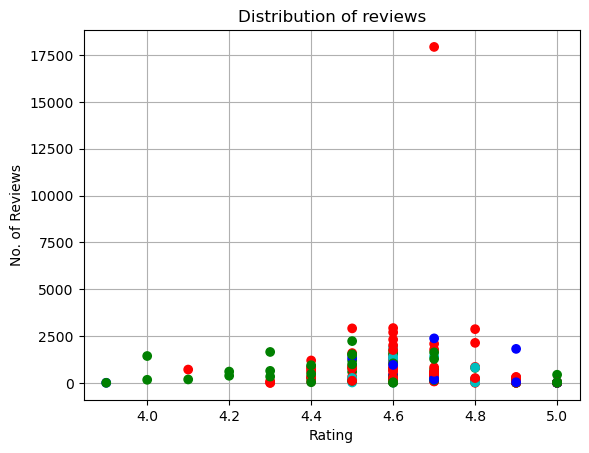

<Figure size 640x480 with 0 Axes>

In [18]:
# plotting a scatter plot
# remove stored figure values
plt.clf()

# making a scatter plot to show the distribution
plt.scatter(coffee_place_review['Rating'], coffee_place_review['Reviews'], c=coffee_place_review['color'])

plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Distribution of reviews')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

plt.show()
plt.savefig('fig_3.png', dpi='figure')

Again we see the outlier stretching the plot. Let's remove it and have a look at the plot again.

In [19]:
# taken from above
coffee_flat_place_review = coffee_flat[['Place type', 'Reviews', 'Rating']]

# mapping colors into the dataframe
coffee_flat_place_review['color'] = coffee_flat_place_review['Place type'].map(color_dict)
coffee_flat_place_review.head()

/tmp/ipykernel_140439/3025186104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_flat_place_review['color'] = coffee_flat_place_review['Place type'].map(color_dict)


,Place type,Reviews,Rating,color
0,Others,206.0,4.6,b
1,Cafe,24.0,5.0,g
2,Coffee shop,11.0,5.0,r
3,Coffee shop,331.0,4.4,r
4,Coffee shop,12.0,5.0,r


<Figure size 640x480 with 0 Axes>

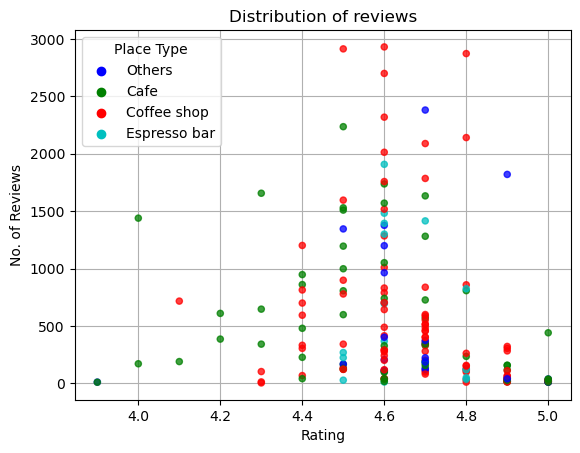

<Figure size 640x480 with 0 Axes>

In [20]:
# plotting a scatter plot
# remove stored figure values
plt.clf()

# making a scatter plot to show the distribution
coffee_flat_place_review.plot(kind='scatter',x='Rating', y='Reviews', c='color', alpha=0.75)

plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Distribution of reviews')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

# Get unique place types and their corresponding colors
place_types = coffee_flat_place_review['Place type'].unique()
colors = coffee_flat_place_review['color'].unique()

# Create legend handles and labels
handles = [plt.scatter([], [], c=color, label=place_type) for place_type, color in zip(place_types, colors)]
labels = place_types

# Add legend with title
plt.legend(handles, labels, title='Place Type')

# Display the plot
plt.show()
plt.savefig('fig_4.png', dpi='figure')

It's not immediately clear regarding the spread and amount of reviews for each place type.

Will try a boxplot instead.

In [21]:
grouped_reviews = coffee_clean.groupby('Place type')['Reviews'].apply(list)
print(grouped_reviews)

Place type
Cafe            [24.0, 18.0, 806.0, 609.0, 172.0, 234.0, 166.0...
Coffee shop     [11.0, 331.0, 12.0, 200.0, 292.0, 31.0, 125.0,...
Espresso bar    [367.0, 14.0, 124.0, 46.0, 27.0, 11.0, 118.0, ...
Others          [206.0, 347.0, 1376.0, 37.0, 1345.0, 12.0, 15....
Name: Reviews, dtype: object


In [22]:
# Create a list of reviews for each place type
reviews_by_place_type = [reviews for _, reviews in grouped_reviews.items()]

print(reviews_by_place_type)

[[24.0, 18.0, 806.0, 609.0, 172.0, 234.0, 166.0, 329.0, 569.0, 860.0, 1195.0, 226.0, 15.0, 726.0, 103.0, 598.0, 14.0, 385.0, 440.0, 807.0, 1656.0, 1570.0, 10.0, 2236.0, 157.0, 998.0, 1509.0, 124.0, 479.0, 190.0, 40.0, 342.0, 327.0, 740.0, 1439.0, 947.0, 156.0, 116.0, 38.0, 33.0, 26.0, 1737.0, 1281.0, 1633.0, 96.0, 189.0, 1529.0, 38.0, 37.0, 170.0, 155.0, 9.0, 1051.0, 18.0, 646.0, 16.0, 341.0], [11.0, 331.0, 12.0, 200.0, 292.0, 31.0, 125.0, 112.0, 14.0, 136.0, 10.0, 1596.0, 1785.0, 459.0, 898.0, 12.0, 112.0, 17.0, 716.0, 15.0, 18.0, 26.0, 485.0, 279.0, 241.0, 18.0, 587.0, 593.0, 1201.0, 67.0, 275.0, 304.0, 97.0, 38.0, 98.0, 341.0, 414.0, 488.0, 837.0, 335.0, 2700.0, 122.0, 21.0, 64.0, 2141.0, 202.0, 113.0, 40.0, 39.0, 789.0, 150.0, 80.0, 10.0, 17937.0, 2931.0, 2089.0, 813.0, 1517.0, 858.0, 702.0, 102.0, 778.0, 1009.0, 2873.0, 24.0, 363.0, 1284.0, 321.0, 699.0, 455.0, 156.0, 304.0, 22.0, 26.0, 282.0, 2319.0, 64.0, 514.0, 110.0, 642.0, 400.0, 403.0, 2914.0, 40.0, 512.0, 3.0, 289.0, 702.0,

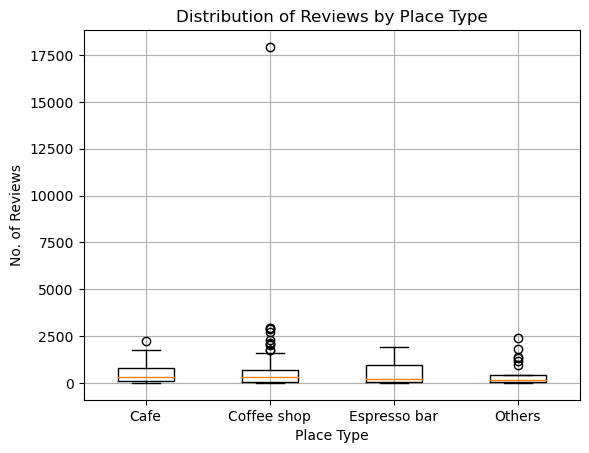

<Figure size 640x480 with 0 Axes>

In [23]:
# Create a box plot
plt.boxplot(reviews_by_place_type, labels=grouped_reviews.keys())

# Set labels and title
plt.xlabel('Place Type')
plt.ylabel('No. of Reviews')
plt.title('Distribution of Reviews by Place Type')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

# Display the plot
plt.show()
plt.savefig('fig_5.png', dpi='figure')

In the figure above we see some clearer distributions, but the outlier again is stretching the plot.

Let's try removing it again to see what happens.

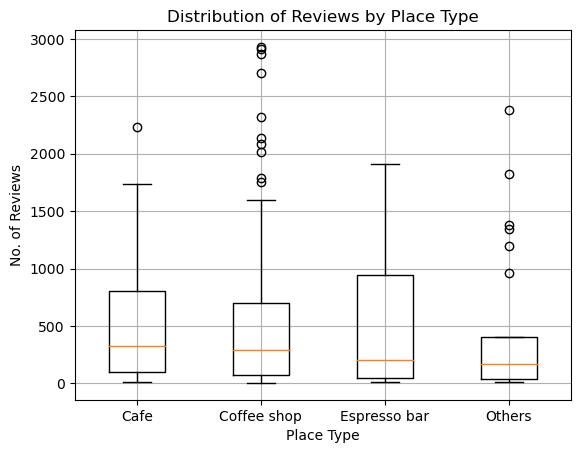

<Figure size 640x480 with 0 Axes>

In [24]:
grouped_reviews = coffee_flat.groupby('Place type')['Reviews'].apply(list)

# Create a list of reviews for each place type
reviews_by_place_type = [reviews for _, reviews in grouped_reviews.items()]

# Create a box plot
plt.boxplot(reviews_by_place_type, labels=grouped_reviews.keys())

# Set labels and title
plt.xlabel('Place Type')
plt.ylabel('No. of Reviews')
plt.title('Distribution of Reviews by Place Type')

# adds grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

# Display the plot
plt.show()
plt.savefig('fig_6.png', dpi='figure')

Based on the plot above, we can see that the IQR range for coffee shops is lower than for cafes and espresso bars. This suggests that for each coffee shop within the max and min range to have less reviews than the other two place types - suggesting lower traffic.

This is probably due to a larger number of coffee shops, and each of them having lesser number of reviews.

However, it's worth noting that there are a few coffee shops that exceed the 1500 number of reviews, and the outlier with close to 18000 number of reviews.

<Figure size 640x480 with 0 Axes>

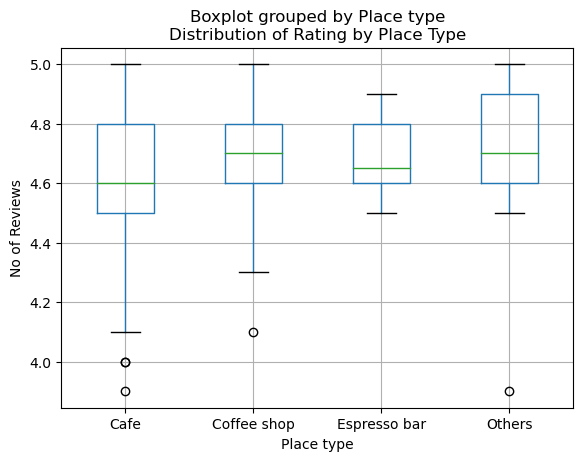

In [25]:
# testing dataframe.boxplot
coffee_reviews = coffee_flat[['Place type', 'Rating']]

plt.clf()

coffee_reviews.boxplot(column='Rating', by = 'Place type')

plt.ylabel('No of Reviews')
plt.title('Distribution of Rating by Place Type')

plt.plot()
plt.savefig('fig_7.png', dpi='figure')

Looks like there's an easier way to do boxplots, but less control.

The plot above suggests that espresso bars and coffee shops having the tighest range of variability. Espresso bars have smaller range of max and min too. However, the median rating of espresso bars are slightly less than coffee shops - despite that there being a larger number of coffee shops in the first place.

### Conclusion and Recommendation
Based on the number of reviews and the ratings of coffee shops, a good starting point is to target coffee shops with >1000 reviews.

Since there are quite a number of outlier coffee shops that sit above the 1500 number of reviews mark, we know for sure that these coffee shops will see a large number of customers - thus more exposure for the coffee cups.

Below is a shortlist of qualifying coffee shops to start with.

In [26]:
shops_to_target = coffee_clean[(coffee_clean['Reviews'] >= 1000) & (coffee_clean['Place type'] == 'Coffee shop')]
shops_to_target[['Place name', 'Reviews', 'Rating']]

# saving into a csv
shops_to_target.to_csv('shops_to_target.csv')